In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


The dataset has been acquired from the Irish Central Statistics Office website.

The name of the dataset is
CJQ03: Recorded Crime Offences by Garda Division, Type of Offence and Quarter

The data has been acquired on 03/11/2016 using the link below:

http://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=CJQ03&PLanguage=0


In [14]:
#import dataset
df = pd.read_csv("c:/DATA_SCIENCE/IRELAND_CRIME_STATISTICS/modified_imput_crime_Stats.csv")#,header=0)
print('list of features:', df.columns.values)


list of features: ['Region' 'CrimeType' '2003Q1' '2003Q2' '2003Q3' '2003Q4' '2004Q1' '2004Q2'
 '2004Q3' '2004Q4' '2005Q1' '2005Q2' '2005Q3' '2005Q4' '2006Q1' '2006Q2'
 '2006Q3' '2006Q4' '2007Q1' '2007Q2' '2007Q3' '2007Q4' '2008Q1' '2008Q2'
 '2008Q3' '2008Q4' '2009Q1' '2009Q2' '2009Q3' '2009Q4' '2010Q1' '2010Q2'
 '2010Q3' '2010Q4' '2011Q1' '2011Q2' '2011Q3' '2011Q4' '2012Q1' '2012Q2'
 '2012Q3' '2012Q4' '2013Q1' '2013Q2' '2013Q3' '2013Q4' '2014Q1' '2014Q2'
 '2014Q3' '2014Q4' '2015Q1' '2015Q2' '2015Q3' '2015Q4' '2016Q1' '2016Q2']


In [24]:
# Get rid of the detailed data now, the single numeric id's are already aggregated to 
#Main geographical region level by the looks of it

#new DF with region column split into two
df_regions=pd.DataFrame(df.Region.str.split(' ,',1).tolist(),
                                   columns = ['regionId','regionName'])

# then merge the new DF with the original DF using the index of the original DF
df_merged  = pd.concat([df, df_regions], axis=1, join_axes=[df.index])

# has two new attributes, regionId and regionName looks ok.
df_merged[:3]

,Region,CrimeType,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,2004Q2,2004Q3,2004Q4,...,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,regionId,regionName
0,"1 ,Northern Region","01 ,Homicide offences",3,0,6,2,5,3,5,3,...,2,1,1,1,5,2,3,0,1,Northern Region
1,"1 ,Northern Region","0111 ,Murder",1,0,2,1,1,1,2,1,...,1,1,0,0,4,2,0,0,1,Northern Region
2,"1 ,Northern Region","0112 ,Manslaughter",1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Northern Region


In [28]:
# convert regionId to string
df_merged['regionId']=df_merged['regionId'].astype('str')
# create filter mask
mask = (df_merged['regionId'].str.len() == 1) 
# apply mask
df_merged = df_merged.loc[mask]

print(df_merged)


                  Region                                          CrimeType  \
0     1 ,Northern Region                              01 ,Homicide offences   
1     1 ,Northern Region                                       0111 ,Murder   
2     1 ,Northern Region                                 0112 ,Manslaughter   
3     1 ,Northern Region                                  0113 ,Infanticide   
4     1 ,Northern Region            012 ,Dangerous driving leading to death   
5     1 ,Northern Region                                02 ,Sexual offences   
6     1 ,Northern Region                       021 ,Rape and sexual assault   
7     1 ,Northern Region                         022 ,Other sexual offences   
8     1 ,Northern Region  03 ,Attempts/threats to murder, assaults, hara...   
9     1 ,Northern Region                               0311 ,Murder-attempt   
10    1 ,Northern Region                                0312 ,Murder-threat   
11    1 ,Northern Region               033 ,Harassme

In [29]:
# preparing a list for the plotting. I might have to aggregate the years laterm the plot will be too  /*badumtsss*/ thick!
list = ['2003Q1' ,'2003Q2' ,'2003Q3', '2003Q4', '2004Q1', '2004Q2',
 '2004Q3', '2004Q4', '2005Q1', '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2',
 '2006Q3', '2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2',
 '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
 '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
 '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
 '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2']

In [31]:
# Basic aggregations per region and per crime type

crimes_region = df_merged.groupby(['Region'])['2003Q1' ,'2003Q2' ,'2003Q3', '2003Q4', '2004Q1', '2004Q2',
 '2004Q3', '2004Q4', '2005Q1', '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2',
 '2006Q3', '2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2',
 '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
 '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
 '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
 '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2'].sum()

crimes_crimetype = df_merged.groupby(['CrimeType'])['2003Q1' ,'2003Q2' ,'2003Q3', '2003Q4', '2004Q1', '2004Q2',
 '2004Q3', '2004Q4', '2005Q1', '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2',
 '2006Q3', '2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2',
 '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
 '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
 '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
 '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2'].sum()

In [32]:

crimes_overall = df_merged.groupby(['Region']).sum()

print(crimes_overall)



                         2003Q1  2003Q2  2003Q3  2003Q4  2004Q1  2004Q2  \
Region                                                                    
1 ,Northern Region        10131   11450   11684   11939   10363   10660   
2 ,Western Region          9435   10348   10781   10503    9874    8930   
3 ,Southern Region        19215   19452   19381   19125   19551   18813   
4 ,Eastern Region         14634   14209   13830   13825   14721   13926   
5 ,South Eastern Region   11542   11773   12210   11568   12790   11356   
6 ,Dublin Region          47889   47030   49112   47017   50626   48364   

                         2004Q3  2004Q4  2005Q1  2005Q2   ...    2014Q1  \
Region                                                    ...             
1 ,Northern Region        10803   12453   11898   12228   ...      8664   
2 ,Western Region          9673   10206    9695    9959   ...      9435   
3 ,Southern Region        19585   20711   21006   22567   ...     16675   
4 ,Eastern Region       

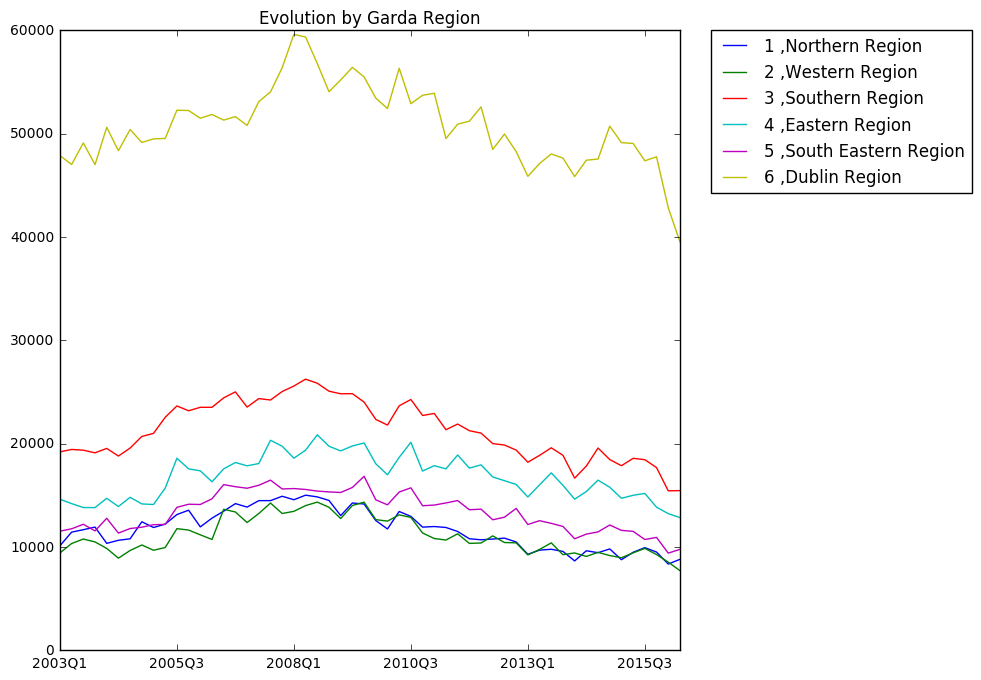

In [35]:
crimes_region[list].transpose().plot(kind='line',figsize=(8, 8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Evolution by Garda Region')